In [3]:
import numpy as np , cv2
from Common.knn import find_number, place_middle, get_cell
import matplotlib.pyplot as plt

In [4]:
size, K = (40, 40),  15                                 # 숫자 영상 크기
nclass, nsample = 10, 20                                # 그룹수, 그룹당 샘플수

In [5]:
train_image = cv2.imread('images/train_numbers.png', cv2.IMREAD_GRAYSCALE)
if train_image is None: raise Exception("영상 파일 읽기 에러")
train_image = train_image[5:405, 6:806]
cv2.threshold(train_image, 32, 255, cv2.THRESH_BINARY, train_image)

(32.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [6]:
cells = [np.hsplit(row, nsample) for row in np.vsplit(train_image, nclass)]
nums = [find_number(c) for c in np.reshape(cells, (-1, 40, 40))]
trainData = np.array([place_middle(n, size) for n in nums])
labels= np.array([ i for i in range(nclass) for j in range(nsample)], np.float32)

In [7]:
print('cells 형태:', np.array(cells).shape)
print('nums 형태:', np.array(nums).shape)
print('trainData 형태:',trainData.shape)
print('labels 형태:',labels.shape)

cells 형태: (10, 20, 40, 40)
nums 형태: (200,)
trainData 형태: (200, 1600)
labels 형태: (200,)


C:\Users\user\AppData\Local\Temp\ipykernel_17312\2215629121.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print('nums 형태:', np.array(nums).shape)


In [8]:
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, labels)       # k-NN 학습 수행

True

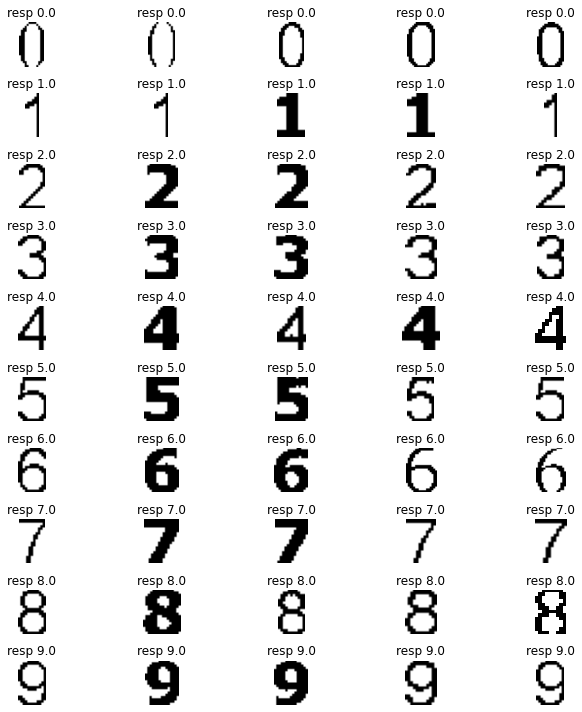

(None, None)

In [9]:
plt.figure(figsize=(10,10))
for i in range(50):
    test_img = cv2.imread('images/num/%d%d.png' % (i / 5 , i % 5), cv2.IMREAD_GRAYSCALE)
    cv2.threshold(test_img, 128, 255, cv2.THRESH_BINARY, test_img)  # 이진화

    num = find_number(test_img)
    data = place_middle(num, size)  # 숫자 객체 중심 배치
    data = data.reshape(1, -1)

    _, [[resp]], _, _ = knn.findNearest(data, K)  # 숫자 분류 수행
    plt.subplot(10, 5, i+1), plt.axis('off'), plt.imshow(num, cmap='gray')
    plt.title('resp ' + str(resp))
plt.tight_layout(), plt.show()